In [1]:
import torch
import torch.nn.functional as F
def connected_components(image: torch.Tensor, num_iterations: int = 100) -> torch.Tensor:
    r"""Computes the Connected-component labelling (CCL) algorithm.

    .. image:: https://github.com/kornia/data/raw/main/cells_segmented.png

    The implementation is an adaptation of the following repository:

    https://gist.github.com/efirdc/5d8bd66859e574c683a504a4690ae8bc

    .. warning::
        This is an experimental API subject to changes and optimization improvements.

    .. note::
       See a working example `here <https://kornia-tutorials.readthedocs.io/en/latest/
       connected_components.html>`__.

    Args:
        image: the binarized input image with shape :math:`(*, 1, H, W)`.
          The image must be in floating point with range [0, 1].
        num_iterations: the number of iterations to make the algorithm to converge.

    Return:
        The labels image with the same shape of the input image.

    Example:
        >>> img = torch.rand(2, 1, 4, 5)
        >>> img_labels = connected_components(img, num_iterations=100)
    """
    if not isinstance(image, torch.Tensor):
        raise TypeError(f"Input imagetype is not a torch.Tensor. Got: {type(image)}")

    if not isinstance(num_iterations, int) or num_iterations < 1:
        raise TypeError("Input num_iterations must be a positive integer.")

    if len(image.shape) < 3 or image.shape[-3] != 1:
        raise ValueError(f"Input image shape must be (*,1,H,W). Got: {image.shape}")

    H, W = image.shape[-2:]
    image_view = image.view(-1, 1, H, W)

    # precompute a mask with the valid values
    mask = image_view == 1

    # allocate the output tensors for labels
    B, _, _, _ = image_view.shape
    out = torch.arange(B * H * W, device=image.device, dtype=image.dtype).view((-1, 1, H, W))
    out[~mask] = 0

    for _ in range(num_iterations):
        out[mask] = F.max_pool2d(out, kernel_size=3, stride=1, padding=1)[mask]

    return out.view_as(image)

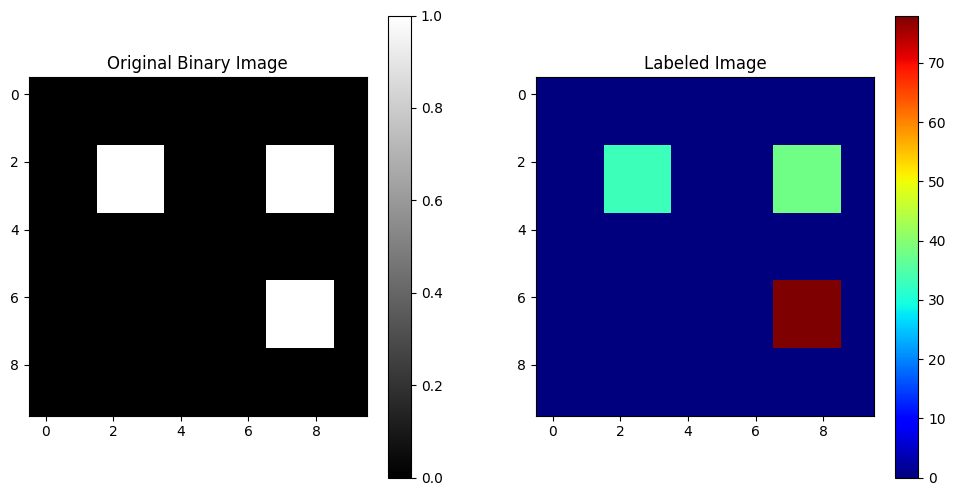

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Create a sample binary image
H, W = 10, 10  # Image dimensions
image = torch.zeros(1, 1, H, W)  # Create a black image
image[0, 0, 2:4, 2:4] = 1  # Add a white square
image[0, 0, 6:8, 7:9] = 1  # Add another white square
image[0, 0, 2:4, 7:9] = 1  # Add a third white square

# Visualize the input image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Binary Image")
plt.imshow(image.squeeze(), cmap='gray')
plt.colorbar()

# Compute connected components
num_iterations = 100
labeled_image = connected_components(image, num_iterations)

# Visualize the labeled image
plt.subplot(1, 2, 2)
plt.title("Labeled Image")
plt.imshow(labeled_image.squeeze(), cmap='jet')
plt.colorbar()
plt.show()
